# **Base**

In [1]:
# modules
import numpy as np
import pandas as pd
import copy

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px

# **0. 데이터 불러오기**

In [2]:
# 파일읽기, 불러오기
df = pd.read_excel('/content/Churn.xlsx')
df

,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,78,0,None,3,1,1,2,Month-to-Month,1,39.65,59.65,1
1,74,1,Offer E,3,1,0,1,Month-to-Month,8,80.65,1024.10,1
2,71,3,Offer D,2,0,2,1,Month-to-Month,18,95.45,1910.88,1
3,78,1,Offer C,2,2,2,1,Month-to-Month,25,98.50,2995.07,1
4,80,1,Offer C,2,0,0,1,Month-to-Month,37,76.50,3102.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,30,0,None,5,0,0,4,Two Year,72,21.15,3039.53,0
7039,38,2,Offer C,3,3,2,2,One Year,24,84.80,2807.47,0
7040,30,2,None,4,2,2,1,One Year,72,103.20,9453.04,0
7041,32,2,None,4,1,0,2,Month-to-Month,11,29.60,319.21,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   7043 non-null   int64  
 1   Number of Dependents  7043 non-null   int64  
 2   Membership            7043 non-null   object 
 3   Satisfaction Score    7043 non-null   int64  
 4   Tech services         7043 non-null   int64  
 5   Streaming services    7043 non-null   int64  
 6   Combined Product      7043 non-null   int64  
 7   Contract              7043 non-null   object 
 8   Tenure in Months      7043 non-null   int64  
 9   Monthly Charge        7043 non-null   float64
 10  Total Revenue         7043 non-null   float64
 11  Churn Value           7043 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 660.4+ KB


## **0-1.수치형 데이터 통계확인**

In [4]:
df.describe()

,Age,Number of Dependents,Satisfaction Score,Tech services,Streaming services,Combined Product,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,3.244924,1.265796,0.772256,2.237683,32.386767,64.761692,3034.379056,0.265370
std,16.750352,0.962802,1.201657,1.287126,0.852573,1.241622,24.542061,30.090047,2865.204542,0.441561
min,19.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,18.250000,21.360000,0.000000
25%,32.000000,0.000000,3.000000,0.000000,0.000000,1.000000,9.000000,35.500000,605.610000,0.000000
50%,46.000000,0.000000,3.000000,1.000000,0.000000,2.000000,29.000000,70.350000,2108.640000,0.000000
75%,60.000000,0.000000,4.000000,2.000000,2.000000,3.000000,55.000000,89.850000,4801.145000,1.000000
max,80.000000,9.000000,5.000000,4.000000,2.000000,4.000000,72.000000,118.750000,11979.340000,1.000000


## **0-2.범주형 데이터 통계확인**

In [5]:
df.describe(include = np.object_)

,Membership,Contract
count,7043,7043
unique,6,3
top,None,Month-to-Month
freq,3877,3610


## **0-3.데이터 프레임 복사**

In [6]:
df1=copy.deepcopy(df)
df1

,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,78,0,None,3,1,1,2,Month-to-Month,1,39.65,59.65,1
1,74,1,Offer E,3,1,0,1,Month-to-Month,8,80.65,1024.10,1
2,71,3,Offer D,2,0,2,1,Month-to-Month,18,95.45,1910.88,1
3,78,1,Offer C,2,2,2,1,Month-to-Month,25,98.50,2995.07,1
4,80,1,Offer C,2,0,0,1,Month-to-Month,37,76.50,3102.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,30,0,None,5,0,0,4,Two Year,72,21.15,3039.53,0
7039,38,2,Offer C,3,3,2,2,One Year,24,84.80,2807.47,0
7040,30,2,None,4,2,2,1,One Year,72,103.20,9453.04,0
7041,32,2,None,4,1,0,2,Month-to-Month,11,29.60,319.21,0


# **1. 데이터 전처리**

## **1-1. 데이터타입 조정**
- 명복 변수 : 원-핫 인코딩
- 순서 변수 : 순서를 보존하여 숫자 형태로 인코딩 필요
  - Membership 카테고리 컬럼을 5단계로 나누어 변경한다.
    - Offer A: 1, Offer B: 2, Offer C: 3, Offer D: 4, Offer E: 5, None: 0
    - 단, 0은 멤버쉽이 아님을 의미하며 'A→E'는 멤버쉽 정도의 '높음→낮음'을 의미한다.
  - Contract 컬럼의 계약 유형도 개월수 데이터로 변경해준다
    - Month-to-month : 1, One year : 12, Two year : 24

In [7]:
# Offer A: 1, Offer B: 2, Offer C: 3, Offer D: 4, Offer E: 5, None: 0 로 변경

df1.loc[df["Membership"]=='Offer A', "Membership"] = 1
df1.loc[df["Membership"]=='Offer B', "Membership"] = 2
df1.loc[df["Membership"]=='Offer C', "Membership"] = 3
df1.loc[df["Membership"]=='Offer D', "Membership"] = 4
df1.loc[df["Membership"]=='Offer E', "Membership"] = 5
df1.loc[df["Membership"]=='None', "Membership"] = 0

df1["Membership"] = df1["Membership"].astype('int64')

In [8]:
# Month-to-month:1, One year:12, Two year:24 로 변경
df1.loc[df["Contract"]=='Month-to-Month', "Contract"] = 1
df1.loc[df["Contract"]=='One Year', "Contract"] = 12
df1.loc[df["Contract"]=='Two Year', "Contract"] = 24

df1["Contract"] = df1["Contract"].astype('int64')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   7043 non-null   int64  
 1   Number of Dependents  7043 non-null   int64  
 2   Membership            7043 non-null   int64  
 3   Satisfaction Score    7043 non-null   int64  
 4   Tech services         7043 non-null   int64  
 5   Streaming services    7043 non-null   int64  
 6   Combined Product      7043 non-null   int64  
 7   Contract              7043 non-null   int64  
 8   Tenure in Months      7043 non-null   int64  
 9   Monthly Charge        7043 non-null   float64
 10  Total Revenue         7043 non-null   float64
 11  Churn Value           7043 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 660.4 KB


## **1-2. 상관관계 분석**

In [10]:
# 'Churn Value'와 다른 열들 간의 상관계수 계산
corr1 = df1.corr()['Churn Value']
corr1

Age                     0.115760
Number of Dependents   -0.218780
Membership              0.120158
Satisfaction Score     -0.754649
Tech services          -0.173094
Streaming services      0.071162
Combined Product       -0.299221
Contract               -0.432670
Tenure in Months       -0.352861
Monthly Charge          0.193356
Total Revenue          -0.223003
Churn Value             1.000000
Name: Churn Value, dtype: float64


-  상관관계 분석 결과, 각 features 별 Churn Value와의 상관관계는 다음과 같았다.

  - 나이 : 나이가 높을 수록 이탈률이 높음
  - 부양가족 : 부양가족 수가 많을수록 이탈률이 낮음
  - 멤버쉽 : 멤버쉽 등급이 높을수록 이탈률이 높음
  - 고객관리점수 : 고객관리점수가 높을수록 이탈률이 낮음
  - 기술서비스 : 기술서비스 이용개수가 많을수록 이탈률이 낮음
  - 부가서비스 : 부가서비스 이용개수가 많을수록 이탈률이 높음
  - 결합상품 : 결합상품 이용개수가 많을수록 이탈률이 낮음
  - 계약형태 : 계약형태가 길수록 이탈률이 낮음
  - 계약기간 : 계약기간이 길수록 이탈률이 낮음
  - 월요금 : 월요금이 높읖수록 이탈률이 높음
  - 총요금 : 총요금이 높을수록 이탈률이 낮음


## **1-3. Encoding (MinMaxScaler)**

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Features 열 지정
num_cols = ['Age', 'Number of Dependents', 'Membership', 'Satisfaction Score',
            'Tech services', 'Streaming services', 'Combined Product',
            'Contract', 'Tenure in Months', 'Monthly Charge', 'Total Revenue']

scaler = MinMaxScaler()
df1[num_cols] = scaler.fit_transform(df1[num_cols])

In [12]:
df1.head()

,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,0.967213,0.000000,0.0,0.50,0.25,0.5,0.333333,0.0,0.000000,0.212935,0.003202,1
1,0.901639,0.111111,1.0,0.50,0.25,0.0,0.000000,0.0,0.098592,0.620896,0.083855,1
2,0.852459,0.333333,0.8,0.25,0.00,1.0,0.000000,0.0,0.239437,0.768159,0.158013,1
3,0.967213,0.111111,0.6,0.25,0.50,1.0,0.000000,0.0,0.338028,0.798507,0.248680,1
4,1.000000,0.111111,0.6,0.25,0.00,0.0,0.000000,0.0,0.507042,0.579602,0.257652,1


## **1-4. 학습/검증 데이터 생성**

In [13]:
from sklearn.model_selection import train_test_split

# Label 데이터셋 추출
label_column = 'Churn Value'
y = df1[label_column]

# Feature 데이터셋 추출
x = df1[num_cols]

# Feature 데이터셋과 Label 데이터셋을 train과 test 세트로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **1-5. SMOTE를 이용한 데이터 불균형 해소**

- 결과해석
  - x_train_over.shape : x_train_over의 샘플 수, 특성 수
  - y_train_over.shape : y_train_over의 샘플 수
  - 불균형을 해결하기 위해 생성된 합성 샘플로 데이터셋의 크기가 증가
  - 레이블 데이터인 y_train도 동일한 수의 샘플을 가지게 되었음

In [14]:
# 데이터 불균형으로 oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

print("oversampling 전 샘플 수 :")
print(x_train.shape, y_train.shape)

print("")
print("oversampling 후 샘플 수 :")
print(x_train_over.shape, y_train_over.shape)

# 초기 변수 x_train, x_test, y_train, y_test
# 최종 변수 x_train_over, x_test, y_train_over, y_test

oversampling 전 샘플 수 :
(5634, 11) (5634,)

oversampling 후 샘플 수 :
(8330, 11) (8330,)


# **2. 모델링(SVM)**

**평가지표 만드는 함수**

In [31]:
# report for model evaluation
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, precision_recall_curve

def model_report(model):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    # AUC - ROC curve
    y_score = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    model_roc_auc = roc_auc_score(y_test, y_pred)
    model_f1_score_macro = precision_recall_fscore_support(y_test, y_pred, average="macro")[2]
    model_f1_score_weighted = precision_recall_fscore_support(y_test, y_pred, average="weighted")[2]
    model_sensitivity = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=1)[0]
    model_specificity = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=0)[0]
    model_precision = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=1)[1]
    print("Confusion Matrix\n", cm, "\n")
    print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))
    print("Accuracy Score      : ", accuracy_score(y_test, y_pred).round(4))
    print("Area Under Curve    : ", model_roc_auc.round(4))
    print("F1 Score (macro)    : ", model_f1_score_macro.round(4))
    print("F1 Score (weighted) : ", model_f1_score_weighted.round(4))
    print("Sensitivity         : ", model_sensitivity.round(4))
    print("Specificity         : ", model_specificity.round(4))
    print("Precision           : ", model_precision.round(4), "\n")

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


## **2-1. SVM 모델 생성**

In [16]:
from sklearn.svm import SVC

svm = SVC(gamma='auto', probability=True).fit(x_train_over, y_train_over)

print('SVM Accuracy Score \n{:.4f}'.format(svm.score(x_test, y_test)))

SVM Accuracy Score 
0.9333


## **2-2. SVM 모델 평가**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Confusion Matrix
 [[958  51]
 [ 43 357]] 

              precision    recall  f1-score   support

    No Churn       0.96      0.95      0.95      1009
       Churn       0.88      0.89      0.88       400

    accuracy                           0.93      1409
   macro avg       0.92      0.92      0.92      1409
weighted avg       0.93      0.93      0.93      1409

Accuracy Score      :  0.9333
Area Under Curve    :  0.921
F1 Score (macro)    :  0.9184
F1 Score (weighted) :  0.9335
Sensitivity         :  0.875
Specificity         :  0.957
Precision           :  0.8925 



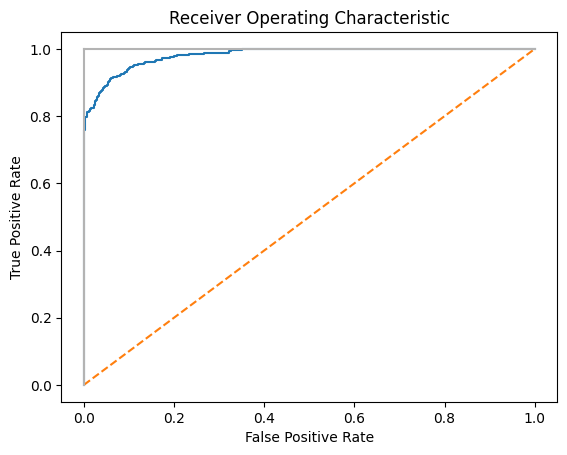

In [32]:
model_report(svm)

## **2-3. 과적합 검증**
- 학습곡선 분석
  - 학습 데이터에서는 정확도가 계속 증가하나, 검증 데이터에서는 정확도가 떨어질 때 과적합이 발생한 것으로 간주

- 다른 평가지표
  - 모델이 학습 데이터에서 높은 정확도를 보이더라도 다른 지표에서 성능이 낮다면 과적합일 가능성이 높음.

- 교차 검증(Cross-Validation)
  - 모델이 여러 폴드로 나누어진 검증 데이터에서 일관된 성능을 보인다면 과적합 가능성이 낮음

-  별도의 테스트 데이터셋
  - 학습과 검증을 거친 모델을 별도의 테스트 데이터셋에서 평가하여 일반화 성능을 확인

### **2-3-1 k-교차검증**
- 모델이 학습 데이터에 대해 높은 정확도를 보이지만, 새로운 데이터에 대해서도 일반화가 잘되고 있음

**5-폴드 교차 검증**

In [33]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 모델 생성 (여기에서는 RandomForestClassifier를 사용)
model = svm

# 교차 검증을 통해 모델의 일반화 성능을 평가합니다.
cv_scores = cross_val_score(model, x_train_over, y_train_over, cv=5)  # 5-폴드 교차 검증
print("교차 검증 정확도 평균:", np.mean(cv_scores))

# 모델을 학습 데이터로 학습시킵니다.
model.fit(x_train_over, y_train_over)

# 테스트 데이터로 모델을 평가합니다.
y_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("테스트 데이터 정확도:", test_accuracy)


교차 검증 정확도 평균: 0.9439375750300119
테스트 데이터 정확도: 0.9332860184528035


**10-폴드 교차 검증**

In [34]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 모델 생성 (여기에서는 RandomForestClassifier를 사용)
model = svm

# 교차 검증을 통해 모델의 일반화 성능을 평가합니다.
cv_scores = cross_val_score(model, x_train_over, y_train_over, cv=10)  # 5-폴드 교차 검증
print("교차 검증 정확도 평균:", np.mean(cv_scores))

# 모델을 학습 데이터로 학습시킵니다.
model.fit(x_train_over, y_train_over)

# 테스트 데이터로 모델을 평가합니다.
y_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("테스트 데이터 정확도:", test_accuracy)


교차 검증 정확도 평균: 0.9434573829531814
테스트 데이터 정확도: 0.9332860184528035


### **2-3-2 학습 곡선**
- 검증 데이터와의 성능 차이가 크지 않고 교차 검증 점수가 안정적으로 상승하고 있다면, 과적합의 가능성은 낮다고 할 수 있음

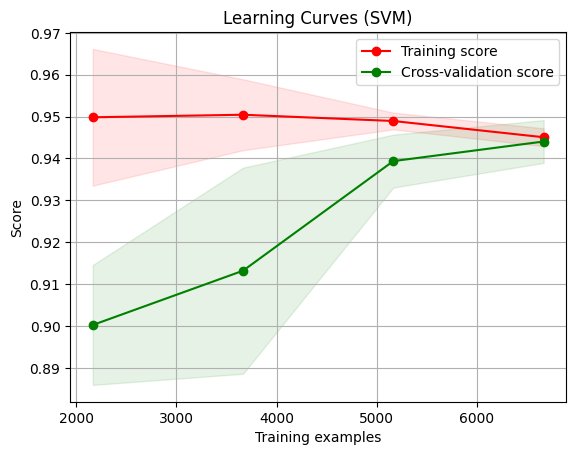

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # SVM 모델 불러오기

# 학습 곡선을 그리는 함수 정의
def plot_learning_curve(estimator, title, X, y, cv, train_sizes):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=make_scorer(accuracy_score)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes,
        test_scores_mean,
        "o-",
        color="g",
        label="Cross-validation score",
    )

    plt.legend(loc="best")
    return plt

# SVM 모델 생성
svm = SVC(kernel='linear', C=1, random_state=42)  # 필요한 SVM 하이퍼파라미터로 설정

# 학습 곡선 그리기
cv = 5  # 교차 검증 폴드 수
train_sizes = np.linspace(0.1, 1.0, 5)  # 학습 데이터 크기 변화
title = "Learning Curves (SVM)"

plot_learning_curve(svm, title, x_train_over, y_train_over, cv=cv, train_sizes=train_sizes)
plt.show()


## **2-4. 중요 변수 더블체크**

- SVM 모델이 LightGBM과 같이 내장된 피처 중요도를 제공하지 않음
- SVM은 피처 중요도를 직접 출력하는 것이 어려우며, 일반적으로 선형 SVM의 경우 계수(coefficient) 값을 통해 간접적으로 피처 중요도를 확인 가능

SVM Accuracy Score: 0.9333
Feature "Age": -0.00288620771232548
Feature "Number of Dependents": 0.001797965460137252
Feature "Membership": -0.0004731488052992246
Feature "Satisfaction Score": 0.27220250768866816
Feature "Tech services": 0.007357463922403644
Feature "Streaming services": 0.0034539862786846917
Feature "Combined Product": 0.004258339247693439
Feature "Contract": 0.005961674946770801
Feature "Tenure in Months": 0.0010645848119233932
Feature "Monthly Charge": 0.0019872249822569595
Feature "Total Revenue": -0.0008043529690087111
Mean Feature Importance: [-0.00288621  0.00179797 -0.00047315  0.27220251  0.00735746  0.00345399
  0.00425834  0.00596167  0.00106458  0.00198722 -0.00080435]


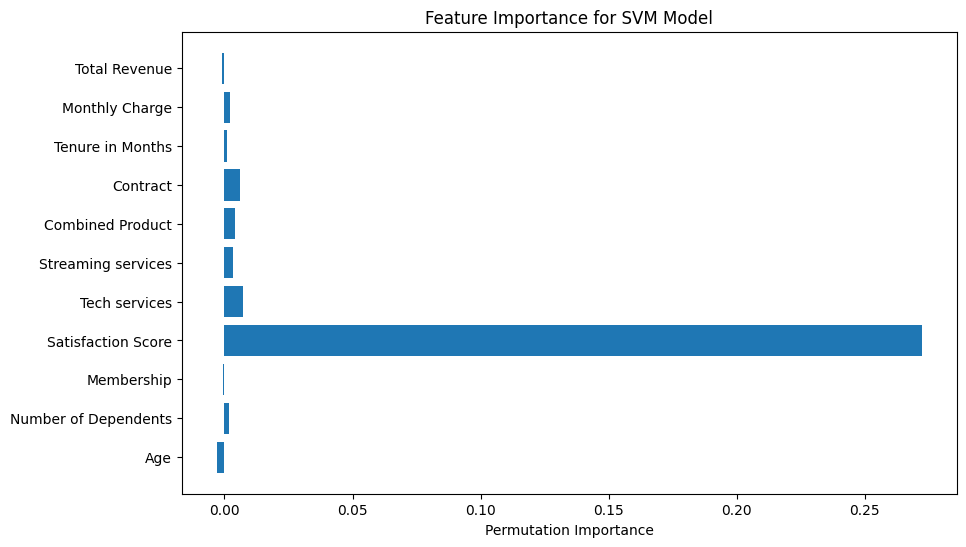

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# SVM 모델 훈련
svm = SVC(gamma='auto', probability=True).fit(x_train_over, y_train_over)

# 테스트 데이터에 대한 예측
y_pred = svm.predict(x_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print('SVM Accuracy Score: {:.4f}'.format(accuracy))

# Permutation Importance 계산
perm_importance = permutation_importance(svm, x_test, y_test, n_repeats=30, random_state=0)

# 피처 중요도와 열 이름 출력
feature_importance = perm_importance.importances_mean
feature_names = list(x_test.columns)  # x_test의 열 이름을 사용하여 열 이름 가져오기

for feature, importance in zip(feature_names, feature_importance):
    print(f'Feature "{feature}": {importance}')

# 평균 피처 중요도 출력
print('Mean Feature Importance:', feature_importance)

# 피처 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Permutation Importance')
plt.title('Feature Importance for SVM Model')
plt.show()


# **3. 가상고객 테스트**

## **3-1. 입력값 전처리 용 변수 선언**

**사용자에게 값 입력 받은 후 자동 전처리 설정**

- min-max scaling 공식 : (입력받은 값 - 최소값) / (최대값 - 최소값)
- 원리 예시
  - age_origin = float(input("나이를 입력하세요: ")) 를 실행했을 때,
    - 입력받은 age_origin의 값이 age_max 보다 클 경우 :
    - **age = (age_origin - age_min) / (age_origin - age_min)**

    - 입력받은 age_origin의 값이 age_min 보다 작을 경우 :
    - **age = (age_origin - age_origin) / (age_max - age_origin)**

    - 입력받은 age_origin의 값이 age_min과 age_max 사이에 있을 경우 :
    - **age = (age_origin - age_min) / (age_max - age_min)**


In [22]:
df.describe()

,Age,Number of Dependents,Satisfaction Score,Tech services,Streaming services,Combined Product,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,3.244924,1.265796,0.772256,2.237683,32.386767,64.761692,3034.379056,0.265370
std,16.750352,0.962802,1.201657,1.287126,0.852573,1.241622,24.542061,30.090047,2865.204542,0.441561
min,19.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,18.250000,21.360000,0.000000
25%,32.000000,0.000000,3.000000,0.000000,0.000000,1.000000,9.000000,35.500000,605.610000,0.000000
50%,46.000000,0.000000,3.000000,1.000000,0.000000,2.000000,29.000000,70.350000,2108.640000,0.000000
75%,60.000000,0.000000,4.000000,2.000000,2.000000,3.000000,55.000000,89.850000,4801.145000,1.000000
max,80.000000,9.000000,5.000000,4.000000,2.000000,4.000000,72.000000,118.750000,11979.340000,1.000000


In [23]:
# 데이터 원본 min, max값
age_max = 80
age_min = 19
number_of_dependents_max = 9
number_of_dependents_min = 0
membership_max = 5
membership_min = 0
satisfaction_score_max = 5
satisfaction_score_min = 1
tech_services_max = 4
tech_services_min = 0
streaming_services_max = 2
streaming_services_min = 0
combined_product_max = 4
combined_product_min = 1
contract_max = 24
contract_min = 1
tenure_in_months_max = 72
tenure_in_months_min = 1
monthly_charge_max = 118.75
monthly_charge_min = 18.25
total_revenue_max = 11979.34
total_revenue_min = 21.36

**가상고객 테스트용 모델 불러오기**

In [24]:
from sklearn.compose import ColumnTransformer

# 특성 이름을 정의합니다.
feature_names = ["Age", "Number of Dependents", "Membership", "Satisfaction Score",
                 "Tech services", "Streaming services", "Combined Product", "Contract",
                 "Tenure in Months", "Monthly Charge", "Total Revenue"]

# ColumnTransformer를 생성합니다.
column_transformer = ColumnTransformer(transformers=[('num', 'passthrough', feature_names)])

# 특성 변환을 수행합니다.
x_train_over_transformed = column_transformer.fit_transform(x_train_over)
x_test_transformed = column_transformer.transform(x_test)

# 모델을 학습합니다.
svm = SVC(gamma='auto', probability=True).fit(x_train_over_transformed, y_train_over)

# 모델의 정확도 출력
print('SVM Accuracy Score \n{:.4f}'.format(svm.score(x_test_transformed, y_test)))

SVM Accuracy Score 
0.9333


## **3-2. input을 이용한 가상고객 테스트**
-  test input 값(churn value=1) : '24', '0', '5', '2', '0', '0', '4', '1', '1', '20.14', '46.39'

### **3-2-1. test1(고위험 이탈그룹)**
-  test input 값(churn value=1) : '24', '0', '5', '2', '0', '0', '4', '1', '1', '20.14', '46.39'

In [25]:
import numpy as np

# 사용자로부터 입력 받기
input_labels = ["나이", "가족 수", "멤버십 단계", "고객 만족도 점수", "기술서비스 이용 개수",
                "부가서비스 이용 개수", "결합상품 이용 개수", "계약 형태", "계약 기간",
                "월 요금", "총 요금"]

input_values = []
for label in input_labels:
    value = float(input(f"{label}를 입력하세요: "))
    input_values.append(value)

# 변환 함수
def transform_and_scale(value, min_val, max_val):
    if value > max_val:
        return (value - value) / (max_val - value)
    elif value < min_val:
        return (value - min_val) / (value - min_val)
    else:
        return (value - min_val) / (max_val - min_val)

# 데이터 스케일링
min_values = [age_min, number_of_dependents_min, membership_min, satisfaction_score_min,
              tech_services_min, streaming_services_min, combined_product_min,
              contract_min, tenure_in_months_min, monthly_charge_min, total_revenue_min]
max_values = [age_max, number_of_dependents_max, membership_max, satisfaction_score_max,
              tech_services_max, streaming_services_max, combined_product_max,
              contract_max, tenure_in_months_max, monthly_charge_max, total_revenue_max]

scaled_data = [transform_and_scale(value, min_val, max_val) for value, min_val, max_val in zip(input_values, min_values, max_values)]

# 입력 데이터를 Numpy 배열로 변환
customer_data = np.array([scaled_data], dtype=np.float32)

# 예측 수행
y_customer_pred = svm.predict(customer_data)

# 예측 확률 계산
y_customer_prob = svm.predict_proba(customer_data)

# 예측 결과 출력
if y_customer_prob[0][1] >= 0.6:
    print("\n고위험 이탈그룹")
elif y_customer_prob[0][1] >= 0.4:
    print("\n잠재적 이탈그룹")
else:
    print("\n안정그룹")

print("이탈확률:", y_customer_prob[0][1])


# features labels
features_labels = ["Age", "Number of Dependents", "Membership", "Satisfaction Score",
                   "Tech services", "Streaming services", "Combined Product", "Contract",
                   "Tenure in Months", "Monthly Charge", "Total Revenue"]


# 각 feature를 변경하면 '안정그룹'으로 예측 결과가 바뀔 수 있는지 확인
threshold = 0.5  # 예측 결과가 '안정그룹'으로 바뀌는 임계값

# 예측 결과가 '안정그룹'인 경우에는 feature 변경 확인을 수행하지 않도록 합니다.
if y_customer_prob[0][1] < threshold:
    print("")
else:
    for i, label in enumerate(features_labels):
        original_value = input_values[i]
        changed_values = [original_value - 0.1, original_value, original_value + 0.1]
        for changed_value in changed_values:
            input_values[i] = changed_value
            scaled_data = [transform_and_scale(value, min_val, max_val) for value, min_val, max_val in zip(input_values, min_values, max_values)]
            customer_data = np.array([scaled_data], dtype=np.float32)
            y_customer_prob_changed = svm.predict_proba(customer_data)

            # '안정그룹'으로 예측되면 출력하지 않고, 그렇지 않은 경우에만 출력합니다.
            if y_customer_prob_changed[0][1] < threshold:
                print(f"\nChanging {label} to {changed_value} could make it '안정그룹'")




# test input 값(churn value=1) : '24', '0', '5', '2', '0', '0', '4', '1', '1', '20.14', '46.39'

나이를 입력하세요: 24
가족 수를 입력하세요: 0
멤버십 단계를 입력하세요: 5
고객 만족도 점수를 입력하세요: 2
기술서비스 이용 개수를 입력하세요: 0
부가서비스 이용 개수를 입력하세요: 0
결합상품 이용 개수를 입력하세요: 4
계약 형태를 입력하세요: 1
계약 기간를 입력하세요: 1
월 요금를 입력하세요: 20
총 요금를 입력하세요: 46

고위험 이탈그룹
이탈확률: 0.9572745021801843

Changing Number of Dependents to -0.1 could make it '안정그룹'


### **3-2-2. test2(고위험 이탈그룹)**
-  test input 값(churn value=1) : '78', '0', '0', '3', '1', '1', '2', '1', '1', '39.65', '59.65'

In [27]:
import numpy as np

# 사용자로부터 입력 받기
input_labels = ["나이", "가족 수", "멤버십 단계", "고객 만족도 점수", "기술서비스 이용 개수",
                "부가서비스 이용 개수", "결합상품 이용 개수", "계약 형태", "계약 기간",
                "월 요금", "총 요금"]

input_values = []
for label in input_labels:
    value = float(input(f"{label}를 입력하세요: "))
    input_values.append(value)

# 변환 함수
def transform_and_scale(value, min_val, max_val):
    if value > max_val:
        return (value - value) / (max_val - value)
    elif value < min_val:
        return (value - min_val) / (value - min_val)
    else:
        return (value - min_val) / (max_val - min_val)

# 데이터 스케일링
min_values = [age_min, number_of_dependents_min, membership_min, satisfaction_score_min,
              tech_services_min, streaming_services_min, combined_product_min,
              contract_min, tenure_in_months_min, monthly_charge_min, total_revenue_min]
max_values = [age_max, number_of_dependents_max, membership_max, satisfaction_score_max,
              tech_services_max, streaming_services_max, combined_product_max,
              contract_max, tenure_in_months_max, monthly_charge_max, total_revenue_max]

scaled_data = [transform_and_scale(value, min_val, max_val) for value, min_val, max_val in zip(input_values, min_values, max_values)]

# 입력 데이터를 Numpy 배열로 변환
customer_data = np.array([scaled_data], dtype=np.float32)

# 예측 수행
y_customer_pred = svm.predict(customer_data)

# 예측 확률 계산
y_customer_prob = svm.predict_proba(customer_data)

# 예측 결과 출력
if y_customer_prob[0][1] >= 0.6:
    print("\n고위험 이탈그룹")
elif y_customer_prob[0][1] >= 0.4:
    print("\n잠재적 이탈그룹")
else:
    print("\n안정그룹")

print("이탈확률:", y_customer_prob[0][1])


# features labels
features_labels = ["Age", "Number of Dependents", "Membership", "Satisfaction Score",
                   "Tech services", "Streaming services", "Combined Product", "Contract",
                   "Tenure in Months", "Monthly Charge", "Total Revenue"]

# 각 feature를 변경하면 '안정그룹'으로 예측 결과가 바뀔 수 있는지 확인
threshold = 0.5  # 예측 결과가 '안정그룹'으로 바뀌는 임계값
for i, label in enumerate(features_labels):
    original_value = input_values[i]
    changed_values = [original_value - 0.1, original_value, original_value + 0.1]
    for changed_value in changed_values:
        input_values[i] = changed_value
        scaled_data = [transform_and_scale(value, min_val, max_val) for value, min_val, max_val in zip(input_values, min_values, max_values)]
        customer_data = np.array([scaled_data], dtype=np.float32)
        y_customer_prob_changed = svm.predict_proba(customer_data)
        if y_customer_prob_changed[0][1] < threshold:
            print(f"\nChanging {label} to {changed_value} could make it '안정그룹'")



# test input 값(churn value=1) : '78', '0', '0', '3', '1', '1', '2', '1', '1', '39.65', '59.65'

나이를 입력하세요: 78
가족 수를 입력하세요: 0
멤버십 단계를 입력하세요: 0
고객 만족도 점수를 입력하세요: 3
기술서비스 이용 개수를 입력하세요: 1
부가서비스 이용 개수를 입력하세요: 1
결합상품 이용 개수를 입력하세요: 2
계약 형태를 입력하세요: 1
계약 기간를 입력하세요: 1
월 요금를 입력하세요: 39
총 요금를 입력하세요: 59

고위험 이탈그룹
이탈확률: 0.8217324823451049

Changing Number of Dependents to -0.1 could make it '안정그룹'

Changing Contract to 0.9 could make it '안정그룹'

Changing Tenure in Months to 0.9 could make it '안정그룹'


### **3-2-2. test3(안정 그룹)**
-  test input 값(churn value=0) : '56', '0', '0', '3', '2', '1', '3', '1', '18', '69.5', '1419.18'

In [28]:
import numpy as np

# 사용자로부터 입력 받기
input_labels = ["나이", "가족 수", "멤버십 단계", "고객 만족도 점수", "기술서비스 이용 개수",
                "부가서비스 이용 개수", "결합상품 이용 개수", "계약 형태", "계약 기간",
                "월 요금", "총 요금"]

input_values = []
for label in input_labels:
    value = float(input(f"{label}를 입력하세요: "))
    input_values.append(value)

# 변환 함수
def transform_and_scale(value, min_val, max_val):
    if value > max_val:
        return (value - value) / (max_val - value)
    elif value < min_val:
        return (value - min_val) / (value - min_val)
    else:
        return (value - min_val) / (max_val - min_val)

# 데이터 스케일링
min_values = [age_min, number_of_dependents_min, membership_min, satisfaction_score_min,
              tech_services_min, streaming_services_min, combined_product_min,
              contract_min, tenure_in_months_min, monthly_charge_min, total_revenue_min]
max_values = [age_max, number_of_dependents_max, membership_max, satisfaction_score_max,
              tech_services_max, streaming_services_max, combined_product_max,
              contract_max, tenure_in_months_max, monthly_charge_max, total_revenue_max]

scaled_data = [transform_and_scale(value, min_val, max_val) for value, min_val, max_val in zip(input_values, min_values, max_values)]

# 입력 데이터를 Numpy 배열로 변환
customer_data = np.array([scaled_data], dtype=np.float32)

# 예측 수행
y_customer_pred = svm.predict(customer_data)

# 예측 확률 계산
y_customer_prob = svm.predict_proba(customer_data)

# 예측 결과 출력
if y_customer_prob[0][1] >= 0.6:
    print("\n고위험 이탈그룹")
elif y_customer_prob[0][1] >= 0.4:
    print("\n잠재적 이탈그룹")
else:
    print("\n안정그룹")

print("이탈확률:", y_customer_prob[0][1])


# features labels
features_labels = ["Age", "Number of Dependents", "Membership", "Satisfaction Score",
                   "Tech services", "Streaming services", "Combined Product", "Contract",
                   "Tenure in Months", "Monthly Charge", "Total Revenue"]


# 각 feature를 변경하면 '안정그룹'으로 예측 결과가 바뀔 수 있는지 확인
threshold = 0.5  # 예측 결과가 '안정그룹'으로 바뀌는 임계값

# 예측 결과가 '안정그룹'인 경우에는 feature 변경 확인을 수행하지 않도록 합니다.
if y_customer_prob[0][1] < threshold:
    print("")
else:
    for i, label in enumerate(features_labels):
        original_value = input_values[i]
        changed_values = [original_value - 0.1, original_value, original_value + 0.1]
        for changed_value in changed_values:
            input_values[i] = changed_value
            scaled_data = [transform_and_scale(value, min_val, max_val) for value, min_val, max_val in zip(input_values, min_values, max_values)]
            customer_data = np.array([scaled_data], dtype=np.float32)
            y_customer_prob_changed = svm.predict_proba(customer_data)

            # '안정그룹'으로 예측되면 출력하지 않고, 그렇지 않은 경우에만 출력합니다.
            if y_customer_prob_changed[0][1] < threshold:
                print(f"\nChanging {label} to {changed_value} could make it '안정그룹'")



# test input 값(churn value=0) : '56', '0', '0', '3', '2', '1', '3', '1', '18', '69.5', '1419.18'

나이를 입력하세요: 56
가족 수를 입력하세요: 0
멤버십 단계를 입력하세요: 0
고객 만족도 점수를 입력하세요: 3
기술서비스 이용 개수를 입력하세요: 2
부가서비스 이용 개수를 입력하세요: 1
결합상품 이용 개수를 입력하세요: 3
계약 형태를 입력하세요: 1
계약 기간를 입력하세요: 18
월 요금를 입력하세요: 69
총 요금를 입력하세요: 1419

안정그룹
이탈확률: 0.2559041853670104



### **3-2-2. test4(고위험이탈->안정그룹)**
- 이 모델이 제안한대로 값을 바꾸면 안정그룹이 될까?

In [30]:
import numpy as np

# 사용자로부터 입력 받기
input_labels = ["나이", "가족 수", "멤버십 단계", "고객 만족도 점수", "기술서비스 이용 개수",
                "부가서비스 이용 개수", "결합상품 이용 개수", "계약 형태", "계약 기간",
                "월 요금", "총 요금"]

input_values = []
for label in input_labels:
    value = float(input(f"{label}를 입력하세요: "))
    input_values.append(value)

# 변환 함수
def transform_and_scale(value, min_val, max_val):
    if value > max_val:
        return (value - value) / (max_val - value)
    elif value < min_val:
        return (value - min_val) / (value - min_val)
    else:
        return (value - min_val) / (max_val - min_val)

# 데이터 스케일링
min_values = [age_min, number_of_dependents_min, membership_min, satisfaction_score_min,
              tech_services_min, streaming_services_min, combined_product_min,
              contract_min, tenure_in_months_min, monthly_charge_min, total_revenue_min]
max_values = [age_max, number_of_dependents_max, membership_max, satisfaction_score_max,
              tech_services_max, streaming_services_max, combined_product_max,
              contract_max, tenure_in_months_max, monthly_charge_max, total_revenue_max]

scaled_data = [transform_and_scale(value, min_val, max_val) for value, min_val, max_val in zip(input_values, min_values, max_values)]

# 입력 데이터를 Numpy 배열로 변환
customer_data = np.array([scaled_data], dtype=np.float32)

# 예측 수행
y_customer_pred = svm.predict(customer_data)

# 예측 확률 계산
y_customer_prob = svm.predict_proba(customer_data)

# 예측 결과 출력
if y_customer_prob[0][1] >= 0.6:
    print("\n고위험 이탈그룹")
elif y_customer_prob[0][1] >= 0.4:
    print("\n잠재적 이탈그룹")
else:
    print("\n안정그룹")

print("이탈확률:", y_customer_prob[0][1])


# features labels
features_labels = ["Age", "Number of Dependents", "Membership", "Satisfaction Score",
                   "Tech services", "Streaming services", "Combined Product", "Contract",
                   "Tenure in Months", "Monthly Charge", "Total Revenue"]


# 각 feature를 변경하면 '안정그룹'으로 예측 결과가 바뀔 수 있는지 확인
threshold = 0.5  # 예측 결과가 '안정그룹'으로 바뀌는 임계값

# 예측 결과가 '안정그룹'인 경우에는 feature 변경 확인을 수행하지 않도록 합니다.
if y_customer_prob[0][1] < threshold:
    print("")
else:
    for i, label in enumerate(features_labels):
        original_value = input_values[i]
        changed_values = [original_value - 0.1, original_value, original_value + 0.1]
        for changed_value in changed_values:
            input_values[i] = changed_value
            scaled_data = [transform_and_scale(value, min_val, max_val) for value, min_val, max_val in zip(input_values, min_values, max_values)]
            customer_data = np.array([scaled_data], dtype=np.float32)
            y_customer_prob_changed = svm.predict_proba(customer_data)

            # '안정그룹'으로 예측되면 출력하지 않고, 그렇지 않은 경우에만 출력합니다.
            if y_customer_prob_changed[0][1] < threshold:
                print(f"\nChanging {label} to {changed_value} could make it '안정그룹'")




# test input 값(churn value=1) : '24', '0', '5', '2', '0', '0', '4', '1', '1', '20.14', '46.39'
# Changing Number of Dependents to -0.1 could make it '안정그룹'
# Changing Contract to 0.9 could make it '안정그룹'
# Changing Tenure in Months to 0.9 could make it '안정그룹'

## new test input 값(churn value=1) : '24', '-0.1', '5', '2', '0', '0', '4', '0.9', '0.9', '20.14', '46.39'

나이를 입력하세요: 24
가족 수를 입력하세요: -0.1
멤버십 단계를 입력하세요: 5
고객 만족도 점수를 입력하세요: 2
기술서비스 이용 개수를 입력하세요: 0
부가서비스 이용 개수를 입력하세요: 0
결합상품 이용 개수를 입력하세요: 4
계약 형태를 입력하세요: 0.9
계약 기간를 입력하세요: 0.9
월 요금를 입력하세요: 20
총 요금를 입력하세요: 46

안정그룹
이탈확률: 0.040174573207984704

